In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
preds_current_stats = pd.read_csv('Nashville Pred. 22-23 Season Stats.csv')

In [37]:
#filtering to our cutoff
preds_current_stats = preds_current_stats.head(40)

In [16]:
szn_78 = pd.read_csv('data_cleaned/team_data_by_szn/teams_07_08.csv')

In [18]:
szn_78 = pd.read_csv('data_cleaned/team_data_by_szn/teams_07_08.csv')
szn_89 = pd.read_csv('data_cleaned/team_data_by_szn/teams_08_09.csv')
szn_910 = pd.read_csv('data_cleaned/team_data_by_szn/teams_09_10.csv')
szn_1011 = pd.read_csv('data_cleaned/team_data_by_szn/teams_10_11.csv')
szn_1112 = pd.read_csv('data_cleaned/team_data_by_szn/teams_11_12.csv')
szn_1314 = pd.read_csv('data_cleaned/team_data_by_szn/teams_13_14.csv')
szn_1415 = pd.read_csv('data_cleaned/team_data_by_szn/teams_14_15.csv')
szn_1516 = pd.read_csv('data_cleaned/team_data_by_szn/teams_15_16.csv')
szn_1617 = pd.read_csv('data_cleaned/team_data_by_szn/teams_16_17.csv')
szn_1718 = pd.read_csv('data_cleaned/team_data_by_szn/teams_17_18.csv')

In [19]:
szn_lists = [szn_78, szn_89, szn_910, szn_1011, szn_1112, szn_1314, szn_1415, szn_1516, szn_1617, szn_1718]

In [20]:
full_szns = pd.concat(szn_lists, axis=0, ignore_index=True)

In [21]:
#dropping null rows
full_szns.loc[full_szns['away_wins'] ==0].index.to_list()
full_szns = full_szns.drop(full_szns.loc[full_szns['away_wins'] ==0].index.to_list())

In [138]:
full_szns= full_szns.drop('Unnamed: 0', axis=1)

In [22]:
PO_teams = full_szns.loc[full_szns['made_playoffs']=="Yes"]

In [23]:
noPO_teams = full_szns.loc[full_szns['made_playoffs']=="No"]

In [24]:
(PO_teams.away_wins+PO_teams.home_wins).median()

46.0

### Is 46 a good benchmark for how many wins we should aim for the predators to end up with?

In [25]:
PO_teams['total_wins'] = PO_teams.away_wins+PO_teams.home_wins
noPO_teams['total_wins'] = noPO_teams.away_wins+noPO_teams.home_wins
full_szns['total_wins'] = full_szns.away_wins + full_szns.home_wins

C:\Users\David\AppData\Local\Temp\ipykernel_11560\38687713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_teams['total_wins'] = PO_teams.away_wins+PO_teams.home_wins
C:\Users\David\AppData\Local\Temp\ipykernel_11560\38687713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noPO_teams['total_wins'] = noPO_teams.away_wins+noPO_teams.home_wins


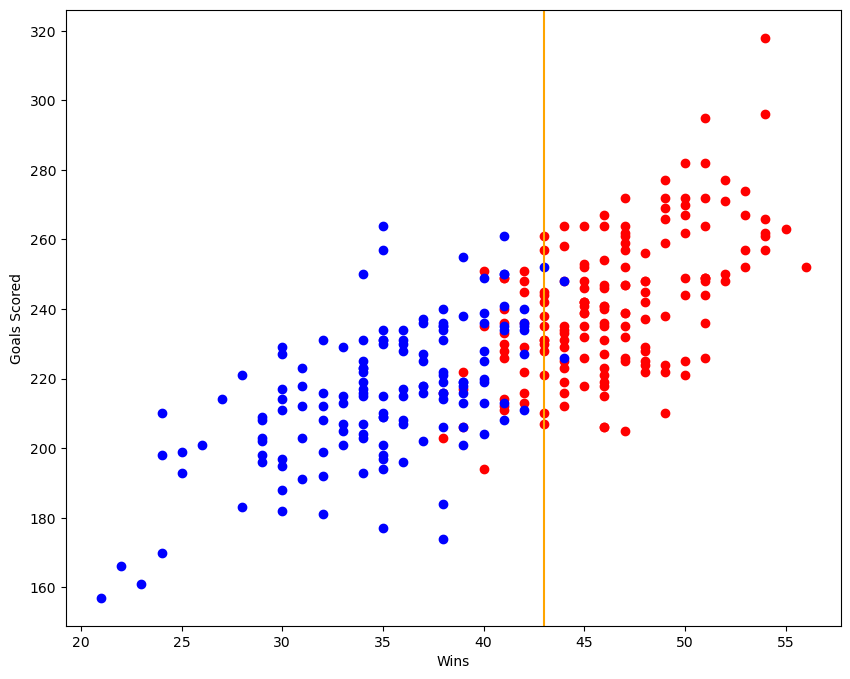

In [144]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.total_wins,y = PO_teams.total_goals_scored,c="red")
plt.scatter(x=noPO_teams.total_wins,y = noPO_teams.total_goals_scored,c="blue")
plt.xlabel("Wins")
plt.ylabel("Goals Scored")
plt.axvline(x = 43, c='orange')

### Based on this plot, it seems very likely that a team will make it to playoffs if they have more than 43 wins

### What about goals scored / allowed?

In [27]:
PO_teams['goal_diff'] = PO_teams.total_goals_scored-PO_teams.total_goals_against
noPO_teams['goal_diff'] = noPO_teams.total_goals_scored-noPO_teams.total_goals_against
full_szns['goal_diff'] = full_szns.total_goals_scored-full_szns.total_goals_against

C:\Users\David\AppData\Local\Temp\ipykernel_11560\2411080551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_teams['goal_diff'] = PO_teams.total_goals_scored-PO_teams.total_goals_against
C:\Users\David\AppData\Local\Temp\ipykernel_11560\2411080551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noPO_teams['goal_diff'] = noPO_teams.total_goals_scored-noPO_teams.total_goals_against


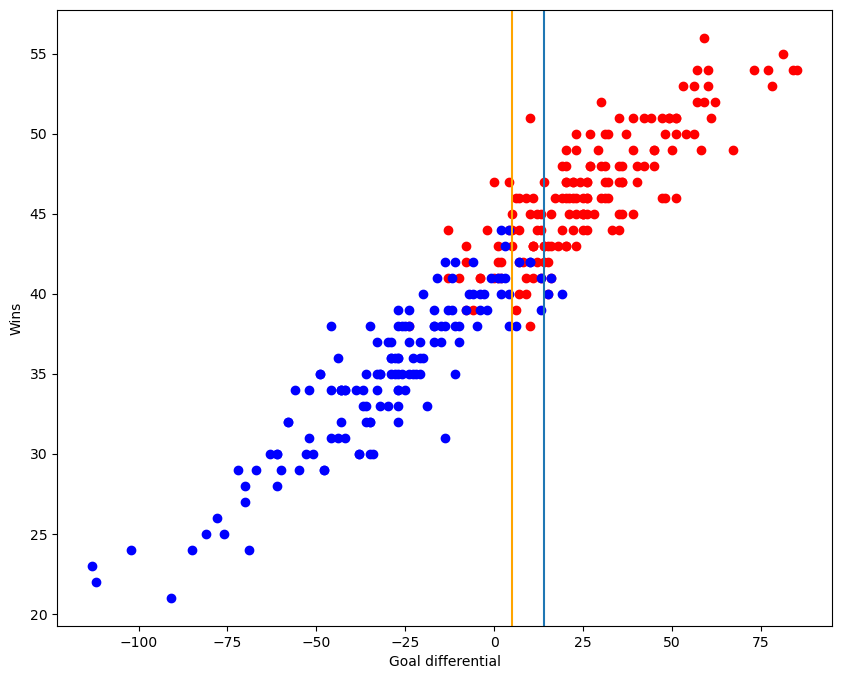

In [145]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.goal_diff,y = PO_teams.total_wins,c="red")
plt.scatter(x=noPO_teams.goal_diff,y = noPO_teams.total_wins,c="blue")
plt.xlabel("Goal differential")
plt.ylabel("Wins")
plt.axvline(x = 14)
plt.axvline(x = 5, c='orange')


### If a team has a goal differntial of at least 14, they seem very likely to make it in to the playoffs. If a team has a goal differential greater than 5, they still seem likely to make the playoffs, but less likely. We can also see that wins and goal differential seem to have a linear relationship

<AxesSubplot:xlabel='goal_diff', ylabel='total_wins'>

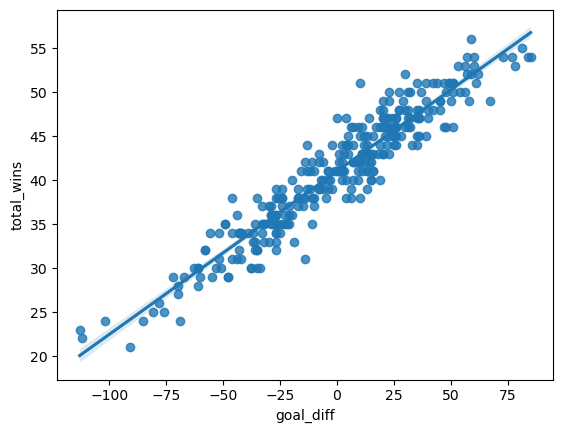

In [117]:
### do regplot
sns.regplot(x=full_szns.goal_diff, y = full_szns.total_wins, data=full_szns)

In [119]:
full_szns.corr()

,Unnamed: 0,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,total_wins,goal_diff
Unnamed: 0,1.000000,-0.321791,-0.287193,0.321791,0.287193,-0.163022,0.409971,-0.354361,-0.378067
away_wins,-0.321791,1.000000,0.474713,-1.000000,-0.474713,0.600182,-0.636668,0.855180,0.813322
home_wins,-0.287193,0.474713,1.000000,-0.474713,-1.000000,0.637289,-0.605386,0.862170,0.816770
away_losses,0.321791,-1.000000,-0.474713,1.000000,0.474713,-0.600182,0.636668,-0.855180,-0.813322
home_losses,0.287193,-0.474713,-1.000000,0.474713,1.000000,-0.637289,0.605386,-0.862170,-0.816770
total_goals_scored,-0.163022,0.600182,0.637289,-0.600182,-0.637289,1.000000,-0.156841,0.720783,0.755823
total_goals_against,0.409971,-0.636668,-0.605386,0.636668,0.605386,-0.156841,1.000000,-0.722997,-0.765216
total_wins,-0.354361,0.855180,0.862170,-0.855180,-0.862170,0.720783,-0.722997,1.000000,0.949169
goal_diff,-0.378067,0.813322,0.816770,-0.813322,-0.816770,0.755823,-0.765216,0.949169,1.000000


In [121]:
#making dummy variable for regression
full_szns['binary_playoffs'] = full_szns['made_playoffs'].apply(lambda x: 1 if x == 'Yes' else 0)
full_szns.head()

,Unnamed: 0,team_name,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,made_playoffs,total_wins,goal_diff,binary_playoffs
0,0,New Jersey Devils,21.0,25.0,20.0,16.0,206.0,197.0,Yes,46.0,9.0,1
1,1,Philadelphia Flyers,21.0,21.0,20.0,20.0,248.0,233.0,Yes,42.0,15.0,1
2,2,Los Angeles Kings,15.0,17.0,26.0,24.0,231.0,266.0,No,32.0,-35.0,0
3,3,Tampa Bay Lightning,11.0,20.0,30.0,21.0,223.0,267.0,No,31.0,-44.0,0
4,4,Boston Bruins,20.0,21.0,21.0,20.0,212.0,222.0,Yes,41.0,-10.0,1


### Above, the regression line can be seen. Also, the correlation coefficient between goal_diff and total_wins is 0.95 - very high!

# boxplots of various stats vs made_playoffs

<AxesSubplot:xlabel='made_playoffs', ylabel='total_goals_scored'>

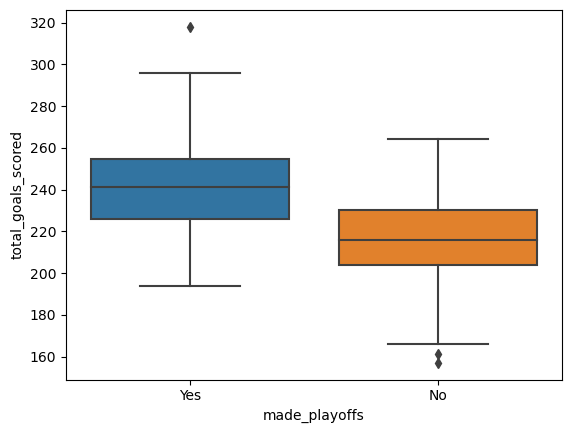

In [137]:
sns.boxplot(x='made_playoffs', y= 'total_goals_scored', data = full_szns)

<AxesSubplot:xlabel='made_playoffs', ylabel='total_goals_against'>

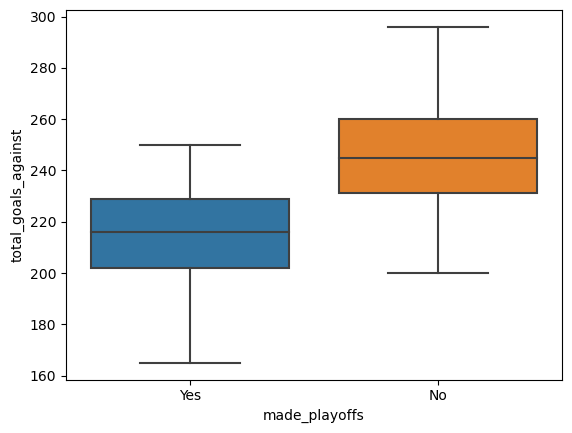

In [139]:
sns.boxplot(x='made_playoffs', y= 'total_goals_against', data = full_szns)

In [146]:
full_szns.corr()

,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,total_wins,goal_diff
away_wins,1.000000,0.474713,-1.000000,-0.474713,0.600182,-0.636668,0.855180,0.813322
home_wins,0.474713,1.000000,-0.474713,-1.000000,0.637289,-0.605386,0.862170,0.816770
away_losses,-1.000000,-0.474713,1.000000,0.474713,-0.600182,0.636668,-0.855180,-0.813322
home_losses,-0.474713,-1.000000,0.474713,1.000000,-0.637289,0.605386,-0.862170,-0.816770
total_goals_scored,0.600182,0.637289,-0.600182,-0.637289,1.000000,-0.156841,0.720783,0.755823
total_goals_against,-0.636668,-0.605386,0.636668,0.605386,-0.156841,1.000000,-0.722997,-0.765216
total_wins,0.855180,0.862170,-0.855180,-0.862170,0.720783,-0.722997,1.000000,0.949169
goal_diff,0.813322,0.816770,-0.813322,-0.816770,0.755823,-0.765216,0.949169,1.000000


## Making models

In [51]:
#model simple linear regression
model = smf.ols(formula = 'total_wins~goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2719.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          3.84e-152
Time:                        11:54:18   Log-Likelihood:                -670.98
No. Observations:                 301   AIC:                             1346.
Df Residuals:                     299   BIC:                             1353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0000      0.130    315.317      0.000      40.744      41.256
goal_diff      0.1853      0.004     52.142      0.000       0.178       0.192
==============================================================================
Omnibus:                        2.316   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.066
Skew:                           0.130   Prob(JB):                        0.356
Kurtosis:                       3.312   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model.get_prediction({'goal_diff' : -5}).summary_frame(alpha=0.05)
#95% confident that they will have between 39 and 40 wins, not enough

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,40.073313,0.131237,39.815048,40.331578,35.62635,44.520276


In [63]:
model.get_prediction({'goal_diff' : 13}).summary_frame(alpha=0.05)
#95% confident that they will have 43 wins, meets the threshold

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,43.409386,0.137994,43.137822,43.680949,38.96163,47.857141


In [47]:
#model with team_names
model = smf.ols(formula = 'total_wins~team_name + goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     86.83
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.90e-123
Time:                        11:52:07   Log-Likelihood:                -648.34
No. Observations:                 301   AIC:                             1365.
Df Residuals:                     267   BIC:                             1491.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             42.7788      0.702     60.923      0.000      41.396      44.161
team_name[T.Arizona Coyotes]          -1.7561      1.349     -1.302      0.194      -4.413       0.900
team_name[T.Atlanta Thrashers]        -1.4762      1.327     -1.112      0.267      -4.089       1.137
team_name[T.Boston Bruins]            -3.6535      0.996     -3.668      0.000      -5.615      -1.692
team_name[T.Buffalo Sabres]           -3.1774      1.006     -3.160      0.002      -5.157      -1.198
team_name[T.Calgary Flames]           -1.1830      0.994     -1.191      0.235      -3.140       0.773
team_name[T.Carolina Hurricanes]      -2.5284      0.999     -2.531      0.012      -4.495      -0.562
team_name[T.Chicago Blackhawks]       -2.7506      0.993     -2.771      0.006      -4.705      -0.796
team_name[T.Colorado Avalanche]       -0.5397      1.000     -0.540      0.590      -2.509       1.429
team_name[T.Columbus Blue Jackets]    -1.7688      0.997     -1.775      0.077      -3.731       0.194
team_name[T.Dallas Stars]             -1.6937      0.992     -1.708      0.089      -3.647       0.259
team_name[T.Detroit Red Wings]        -2.0000      0.990     -2.020      0.044      -3.950      -0.050
team_name[T.Edmonton Oilers]          -2.5412      1.015     -2.504      0.013      -4.539      -0.543
team_name[T.Florida Panthers]         -2.2654      0.999     -2.268      0.024      -4.232      -0.299
team_name[T.Los Angeles Kings]        -3.1223      0.990     -3.153      0.002      -5.072      -1.173
team_name[T.Minnesota Wild]           -1.8377      0.991     -1.855      0.065      -3.789       0.113
team_name[T.Montreal Canadiens]       -2.0970      0.991     -2.116      0.035      -4.048      -0.146
team_name[T.Nashville Predators]      -0.9260      0.990     -0.935      0.351      -2.876       1.024
team_name[T.New Jersey Devils]        -0.7201      0.994     -0.725      0.469      -2.676       1.236
team_name[T.New York Islanders]       -1.2552      1.006     -1.247      0.213      -3.237       0.726
team_name[T.New York Rangers]         -1.8402      0.991     -1.857      0.064      -3.791       0.110
team_name[T.Ottawa Senators]          -1.2726      0.998     -1.276      0.203      -3.237       0.691
team_name[T.Philadelphia Flyers]      -2.6262      0.990     -2.652      0.008      -4.576      -0.676
team_name[T.Phoenix Coyotes]          -0.6681      1.146     -0.583      0.560      -2.925       1.588
team_name[T.Pittsburgh Penguins]      -1.2908      0.995     -1.297      0.196      -3.250       0.668
team_name[T.San Jose Sharks]          -1.1874      0.993     -1.195      0.233      -3.143       0.769
team_name[T.St Louis Blues]           -1.6070      0.991     -1.622      0.106      -3.557      

In [147]:
#model simple linear regression
model = smf.ols(formula = 'away_wins~goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              away_wins   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     584.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.65e-72
Time:                        13:23:11   Log-Likelihood:                -689.64
No. Observations:                 301   AIC:                             1383.
Df Residuals:                     299   BIC:                             1391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5947      0.138    134.408      0.000      18.322      18.867
goal_diff      0.0914      0.004     24.172      0.000       0.084       0.099
==============================================================================
Omnibus:                        1.273   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.294
Skew:                           0.156   Prob(JB):                        0.524
Kurtosis:                       2.924   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
model.get_prediction({'goal_diff' : -5}).summary_frame(alpha=0.05)
#95% confident that they will have between 39 and 40 wins, not enough

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,18.137616,0.139631,17.862832,18.4124,13.406221,22.86901


In [151]:
preds_away['Goals For'].sum() - preds_away['Goals Against'].sum()

-5.0

In [152]:
preds_home['Goals For'].sum() - preds_home['Goals Against'].sum()

0.0

In [154]:
model = smf.ols(formula = 'home_wins~goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              home_wins   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     599.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.16e-73
Time:                        13:40:35   Log-Likelihood:                -694.00
No. Observations:                 301   AIC:                             1392.
Df Residuals:                     299   BIC:                             1399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4053      0.140    159.624      0.000      22.129      22.682
goal_diff      0.0939      0.004     24.479      0.000       0.086       0.101
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.390
Skew:                          -0.080   Prob(JB):                        0.823
Kurtosis:                       2.928   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
model.get_prediction({'goal_diff' : -5}).summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,21.935697,0.141668,21.656905,22.21449,17.13528,26.736115


## goals scored: 112
## goals against: 117

In [69]:
model.get_prediction({'team_name': 'Nashville Predators', 'goal_diff' : -5}).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,40.073313,0.131237,39.815048,40.331578,35.62635,44.520276


Based on goal differential alone, if the preds keep their current differential of 2, we can assume with 95% accuracy that they will end the season with 39-40 wins. Thats a bit below the cutoff for being likely to make playoffs based on our EDA, so they need to improve their goal differential.

In [61]:
model.get_prediction({'team_name': 'Nashville Predators', 'goal_diff' : 13}).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,43.409386,0.137994,43.137822,43.680949,38.96163,47.857141


 ### using the model, we can try to predict what goal differential is needed to be likely to have a record of 43 or more (the cutoff we found earlier for being likely to make playoffs). The model suggest that a goal differential of 13 gives us 95% confidence that a team will have a record of 43 games won, which is close to our cutoff of being playoff likely with a GD of 14.

# Training and test data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train, test = train_test_split(full_szns, test_size=0.2)

## simple linear regression model

In [97]:
full_szns.columns

Index(['Unnamed: 0', 'team_name', 'away_wins', 'home_wins', 'away_losses',
       'home_losses', 'total_goals_scored', 'total_goals_against',
       'made_playoffs', 'total_wins', 'goal_diff'],
      dtype='object')

In [107]:
model = smf.ols(formula = 'total_wins~away_wins+away_losses+goal_diff', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1504.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.13e-135
Time:                        12:16:47   Log-Likelihood:                -492.84
No. Observations:                 240   AIC:                             991.7
Df Residuals:                     237   BIC:                             1002.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0498      0.000    271.163      0.000       0.049       0.050
away_wins       1.2383      0.028     44.639      0.000       1.184       1.293
away_losses     0.8033      0.023     34.634      0.000       0.758       0.849
goal_diff       0.1453      0.006     25.246      0.000       0.134       0.157
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.245
Skew:                           0.039   Prob(JB):                        0.885
Kurtosis:                       2.864   Cond. No.                     4.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
prediction = model.predict(test)

In [109]:
#RSME
np.sqrt(((test.total_wins - prediction)**2).mean())

2.4140004404254816

including away record on model yeilds best RSME

In [136]:
preds_current_stats['Goals Against'].sum()

167.0

In [129]:
#home wins
preds_home = preds_current_stats.loc[preds_current_stats['Unnamed: 3'] != '@']
print('Home record:', len(preds_home.loc[preds_home.Result == 'W']), '-', len(preds_home.loc[preds_home.Result == 'L']))

Home record: 9 - 9


In [132]:
preds_away = preds_current_stats.loc[preds_current_stats['Unnamed: 3'] == '@']
print('Away record:', len(preds_away.loc[preds_away.Result == 'W']), '-', len(preds_away.loc[preds_away.Result == 'L']))

Away record: 10 - 12


In [112]:
full_szns.median()

C:\Users\David\AppData\Local\Temp\ipykernel_11560\3010576682.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full_szns.median()


Unnamed: 0              15.0
away_wins               19.0
home_wins               23.0
away_losses             22.0
home_losses             18.0
total_goals_scored     229.0
total_goals_against    229.0
total_wins              41.0
goal_diff                4.0
dtype: float64

In [ ]:
model.get_prediction({'total_goals_scored' : -10}).summary_frame(alpha=0.05)

# Predicting how many wins Preds will have

In [140]:
full_szns.columns

Index(['team_name', 'away_wins', 'home_wins', 'away_losses', 'home_losses',
       'total_goals_scored', 'total_goals_against', 'made_playoffs',
       'total_wins', 'goal_diff'],
      dtype='object')

In [141]:
preds_prediction_df = pd.DataFrame(columns=['team_name', 'away_wins', 'home_wins', 'away_losses', 'home_losses',
       'total_goals_scored', 'total_goals_against', 'made_playoffs',
       'total_wins', 'goal_diff'])

In [143]:
preds_prediction_df.loc[len(preds_prediction_df.index)] = ['Nashville Predators', 10, 9, 12, 9, 11, 112, 117, '?', 19, -5] 


ValueError: cannot set a row with mismatched columns